In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-optimal-fertilizers-1/sample_submission.csv
/kaggle/input/predicting-optimal-fertilizers-1/train.csv
/kaggle/input/predicting-optimal-fertilizers-1/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("/kaggle/input/predicting-optimal-fertilizers-1/train.csv")

In [4]:
train_df

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...,...
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,749998,31,68,29,Red,Cotton,9,11,12,20-20


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [6]:
train_df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Temparature,750000.0,31.503565,4.025574,25.0,28.00,32.0,35.00,38.0
Humidity,750000.0,61.038912,6.647695,50.0,55.00,61.0,67.00,72.0
Moisture,750000.0,45.184147,11.794594,25.0,35.00,45.0,55.00,65.0
Nitrogen,750000.0,23.093808,11.216125,4.0,13.00,23.0,33.00,42.0
Potassium,750000.0,9.478296,5.765622,0.0,4.00,9.0,14.00,19.0
Phosphorous,750000.0,21.073227,12.346831,0.0,10.00,21.0,32.00,42.0


In [8]:
train_df.head(10)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP
5,5,30,59,29,Red,Pulses,10,0,9,20-20
6,6,27,62,53,Sandy,Paddy,26,15,22,28-28
7,7,36,62,44,Red,Pulses,30,12,35,14-35-14
8,8,36,51,32,Loamy,Tobacco,19,17,29,17-17-17
9,9,28,50,35,Red,Tobacco,25,12,16,20-20


In [9]:
train_df.tail(10)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
749990,749990,36,50,61,Loamy,Paddy,4,10,0,28-28
749991,749991,26,67,58,Sandy,Pulses,32,15,4,28-28
749992,749992,37,54,53,Red,Wheat,14,4,18,20-20
749993,749993,28,54,55,Black,Tobacco,14,2,35,Urea
749994,749994,32,68,36,Black,Ground Nuts,32,18,16,14-35-14
749995,749995,25,69,30,Clayey,Maize,8,16,6,28-28
749996,749996,37,64,58,Loamy,Sugarcane,38,8,20,17-17-17
749997,749997,35,68,59,Sandy,Ground Nuts,6,11,29,10-26-26
749998,749998,31,68,29,Red,Cotton,9,11,12,20-20
749999,749999,33,55,29,Loamy,Cotton,4,10,9,Urea


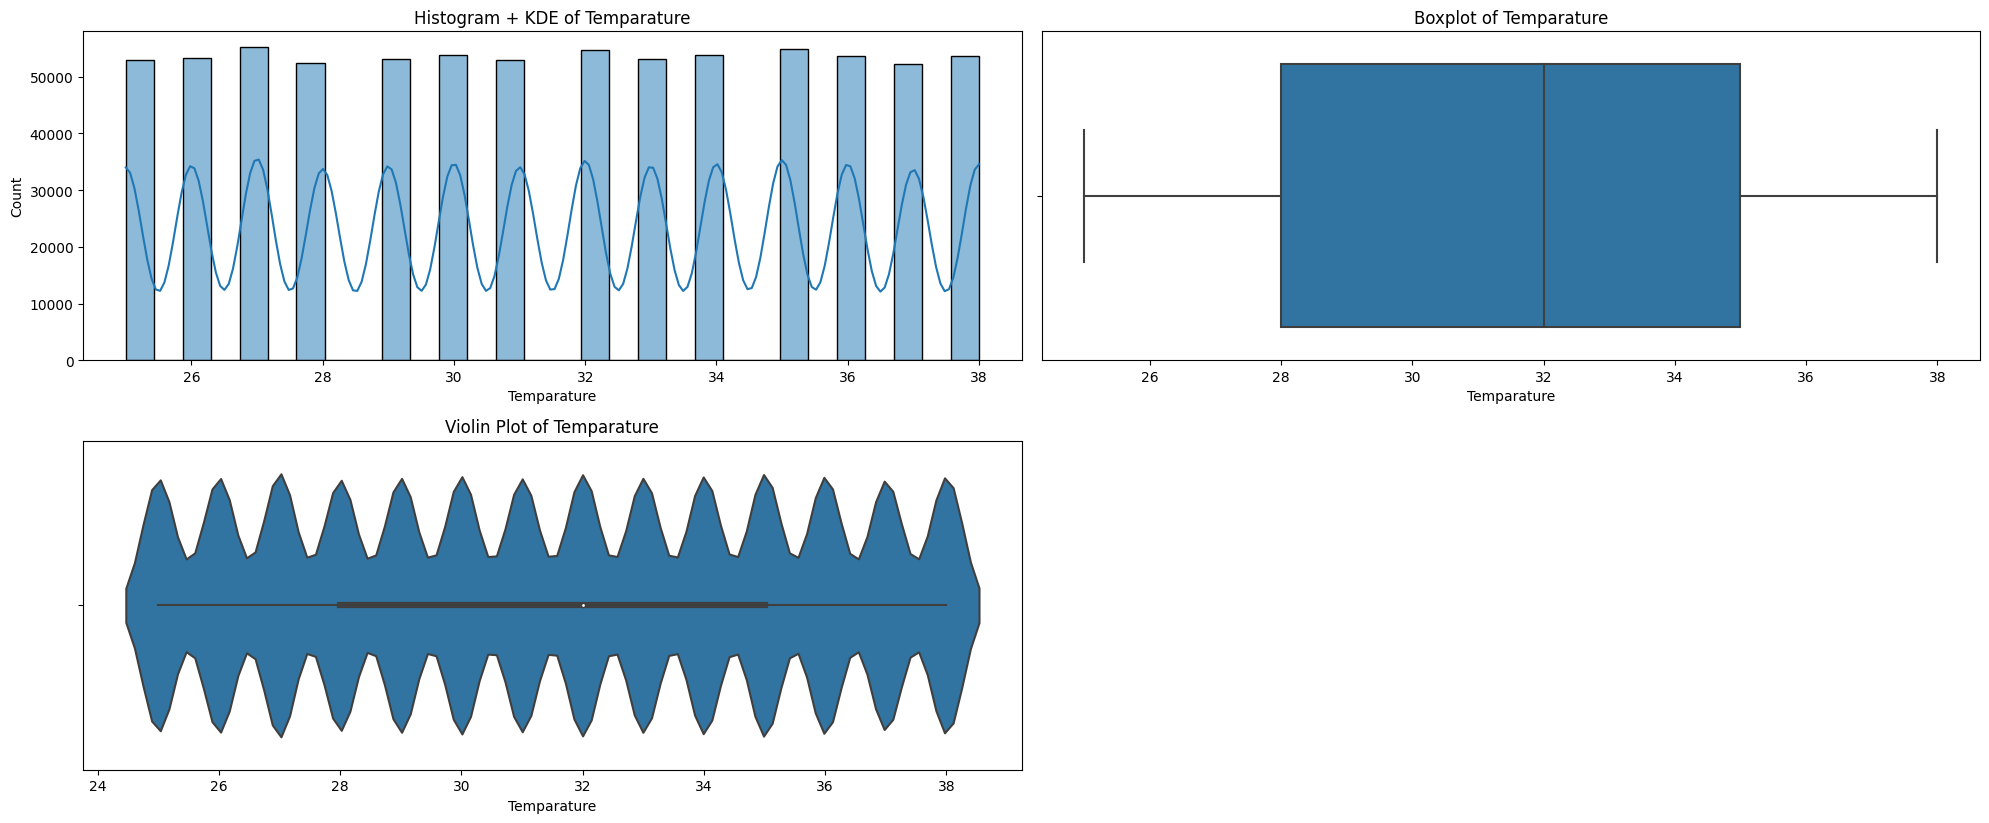

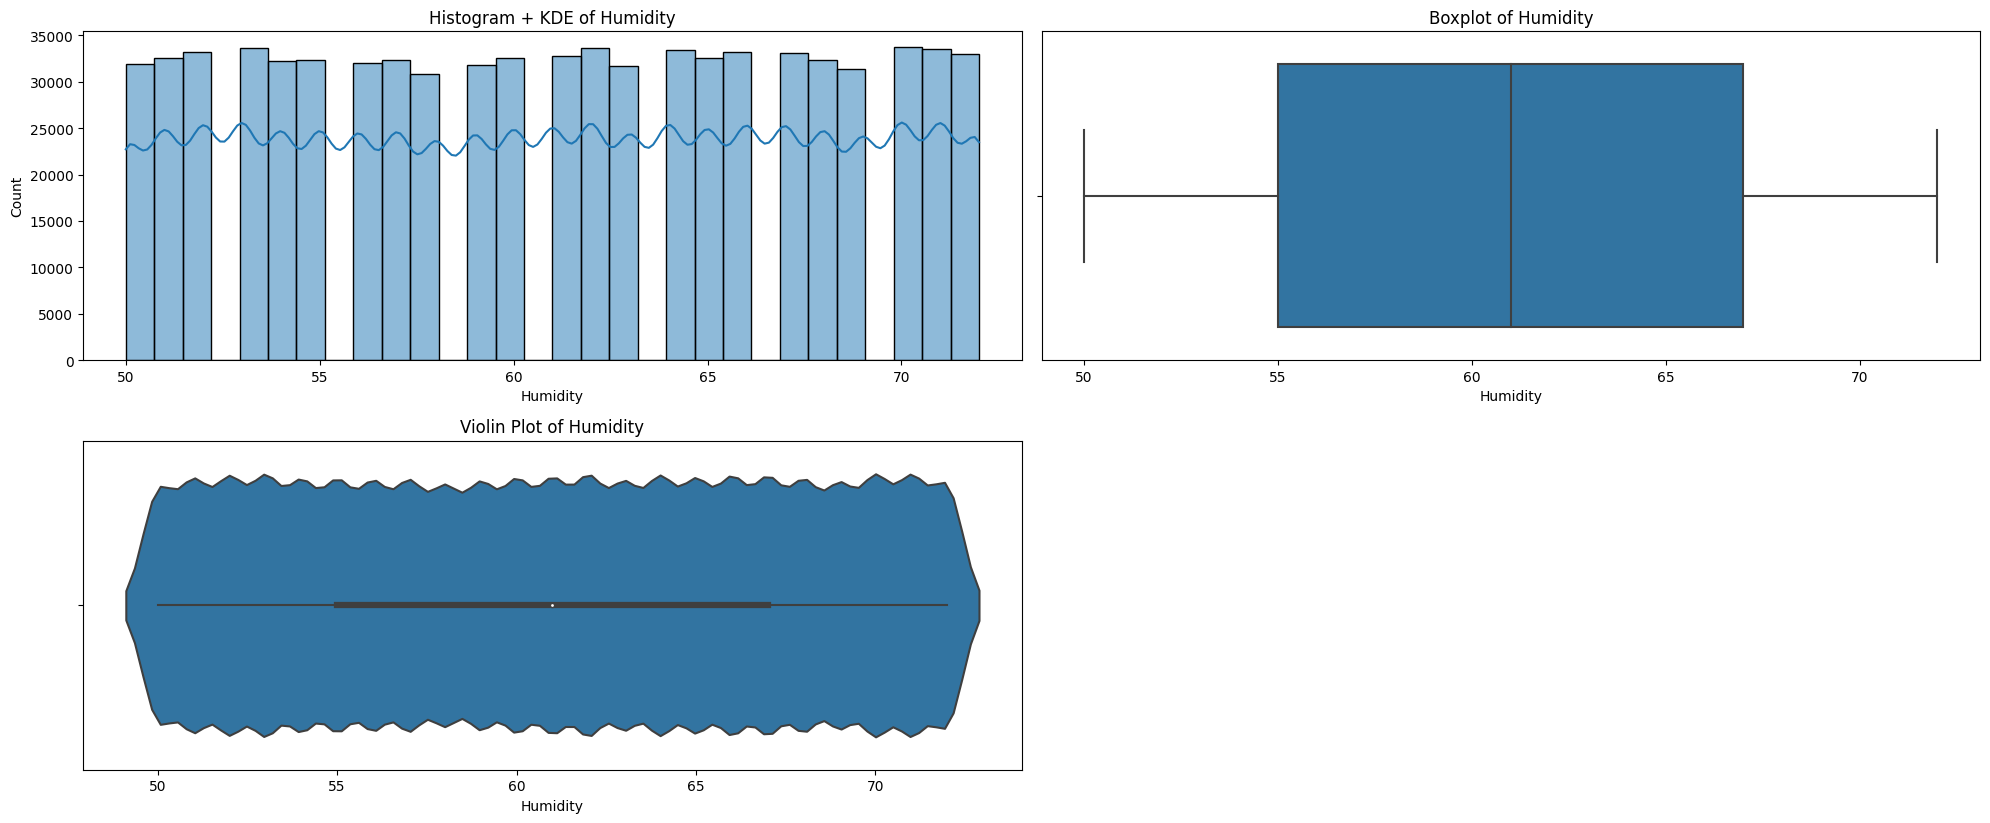

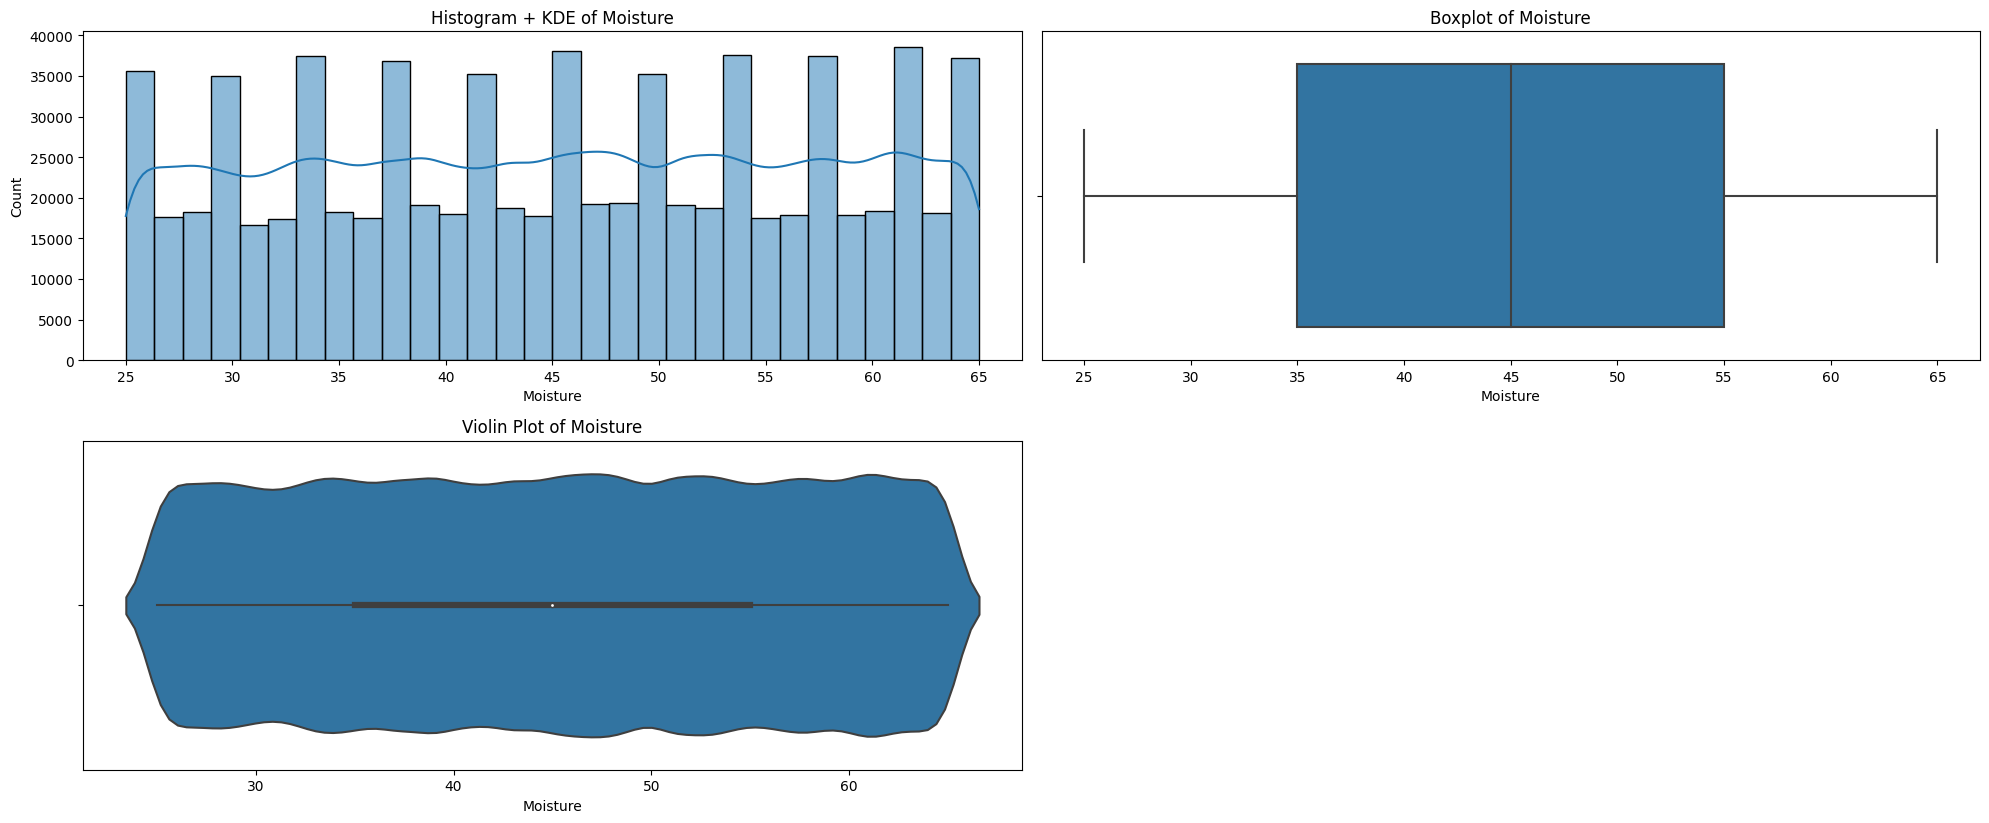

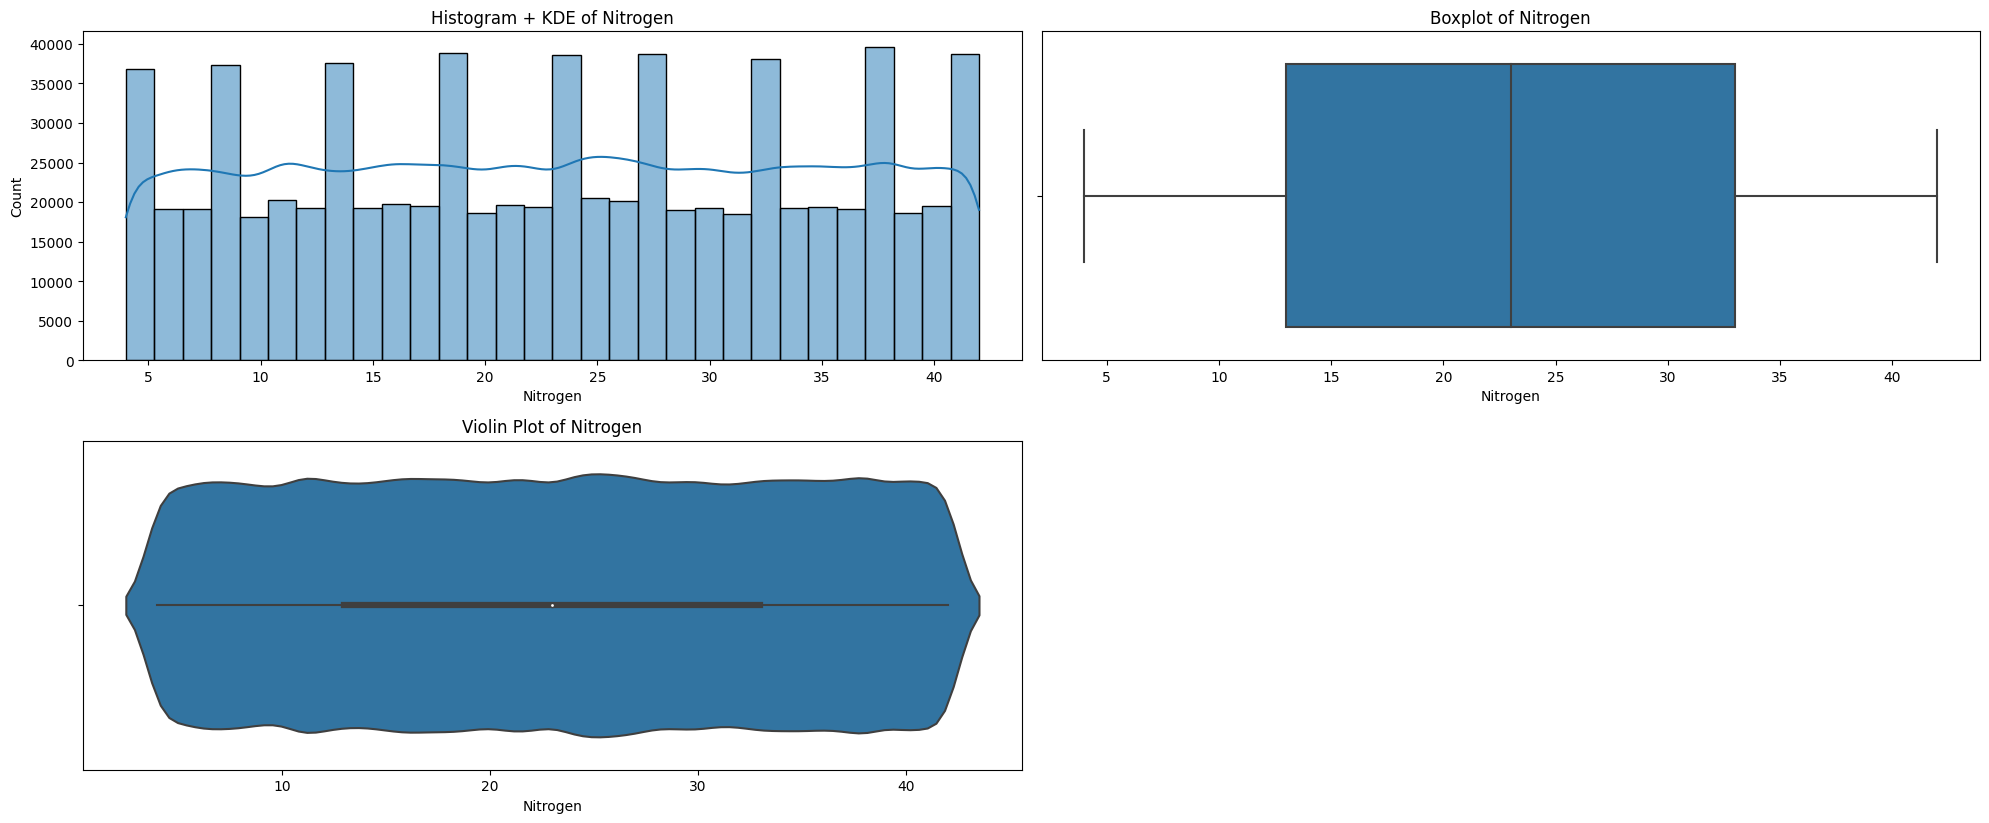

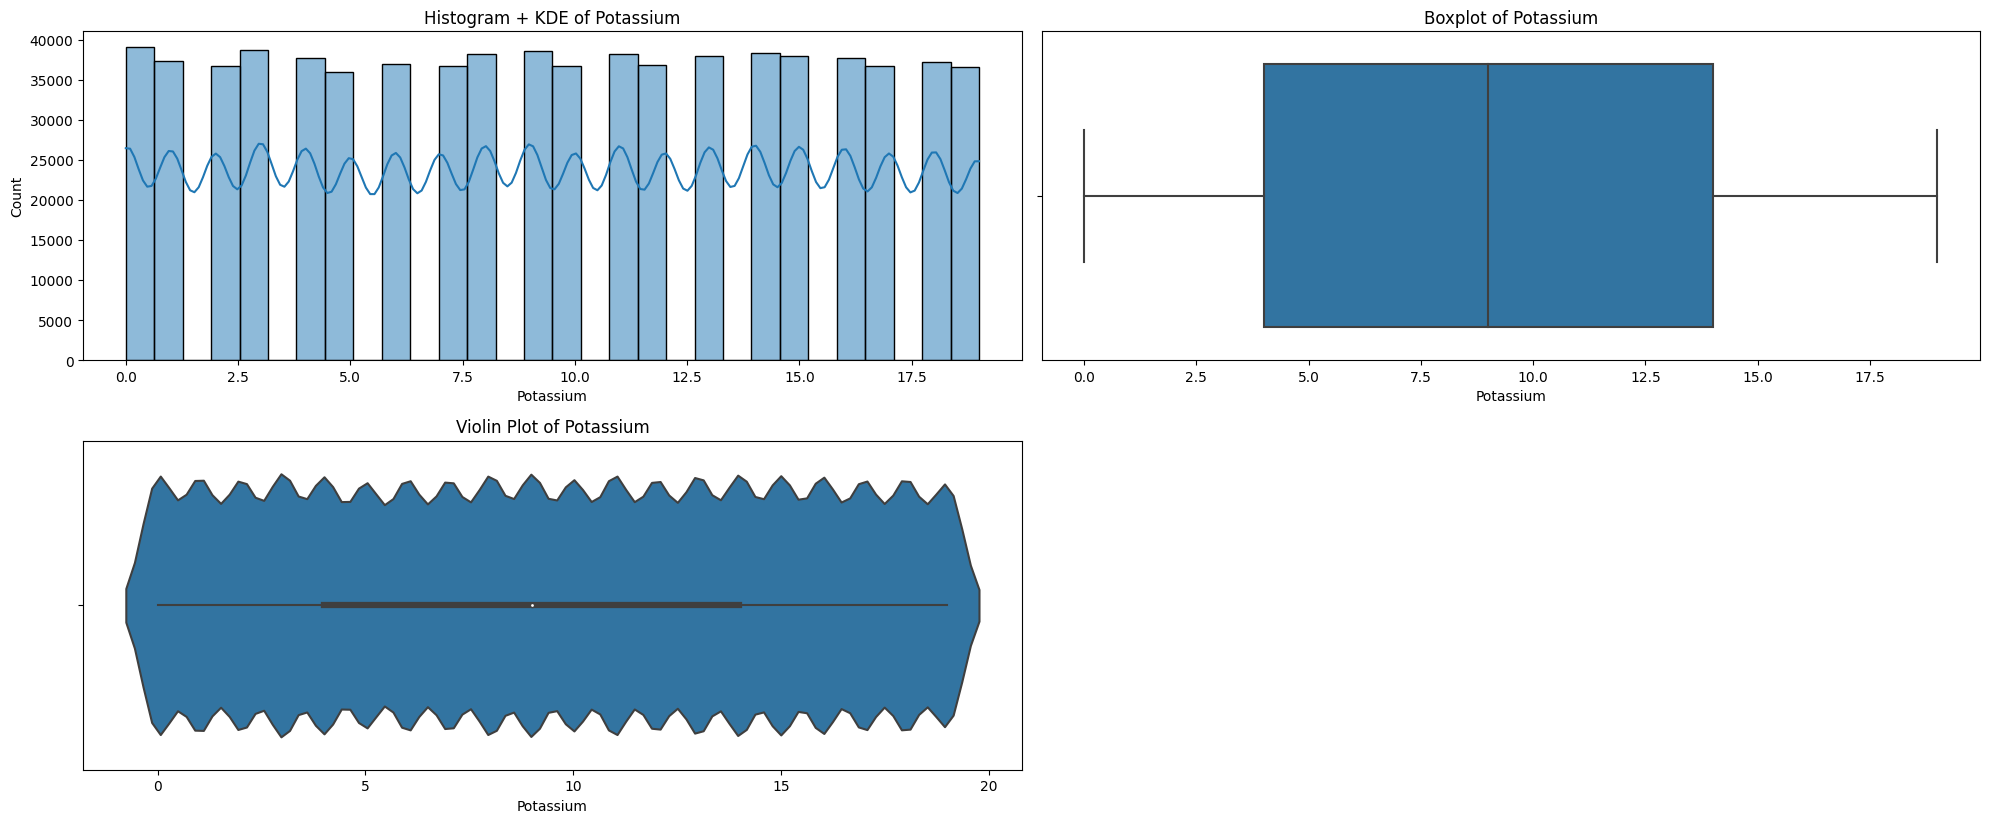

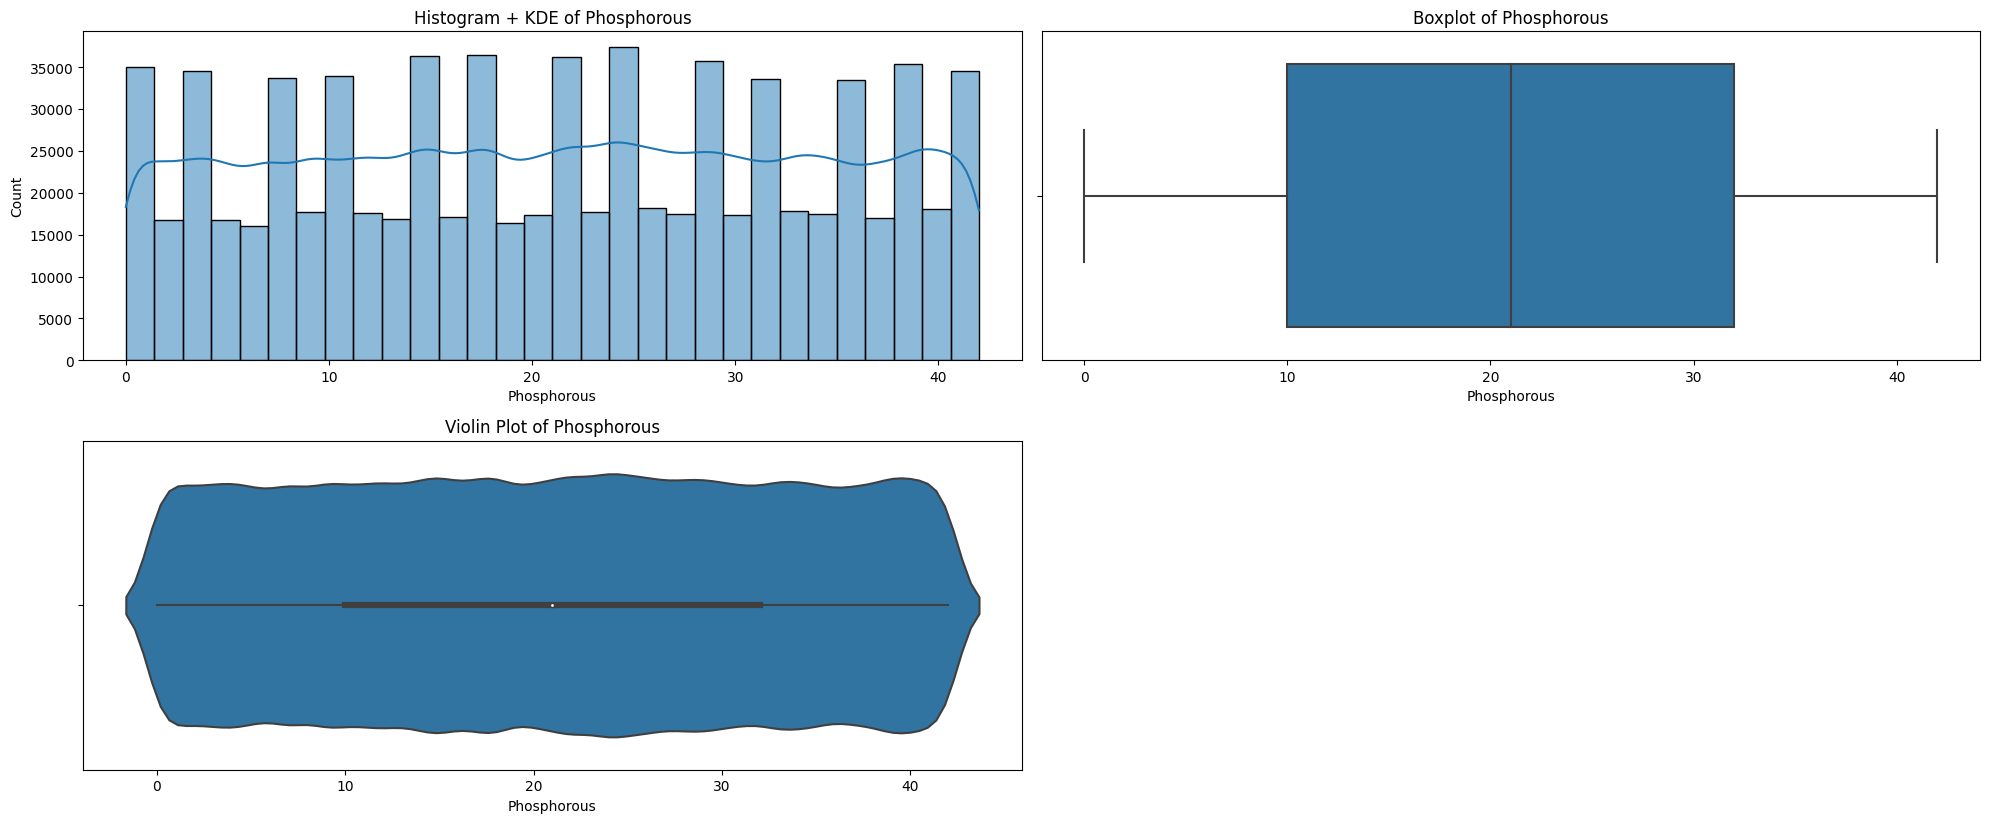

In [10]:
features = [
    "Temparature",
    "Humidity",
    "Moisture",
    "Nitrogen",
    "Potassium",
    "Phosphorous"
]

target = "target_column"  

for feature in features:
    plt.figure(figsize=(20, 12))
    
   
    plt.subplot(3, 2, 1)
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f"Histogram + KDE of {feature}")
    
  
    plt.subplot(3, 2, 2)
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot of {feature}")
    
 
    plt.subplot(3, 2, 3)
    sns.violinplot(x=train_df[feature])
    plt.title(f"Violin Plot of {feature}")
    
  
    if target in train_df.columns:
        plt.subplot(3, 2, 4)
        sns.scatterplot(x=train_df[feature], y=train_df[target])
        plt.title(f"Scatter Plot of {feature} vs {target}")
    
    
    if target in train_df.columns and train_df[target].dtype == 'object':
        plt.subplot(3, 2, 5)
        sns.swarmplot(x=train_df[target], y=train_df[feature])
        plt.title(f"Swarm Plot of {feature} by {target}")
    
    plt.tight_layout()
    plt.show()

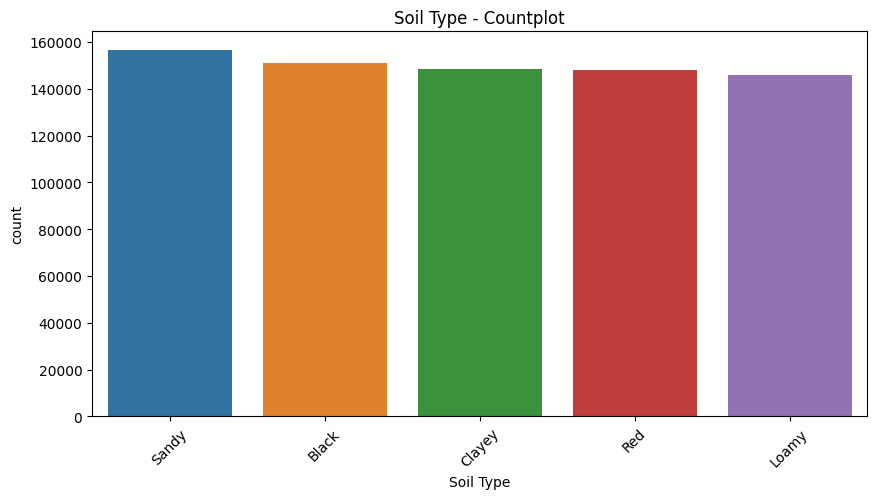

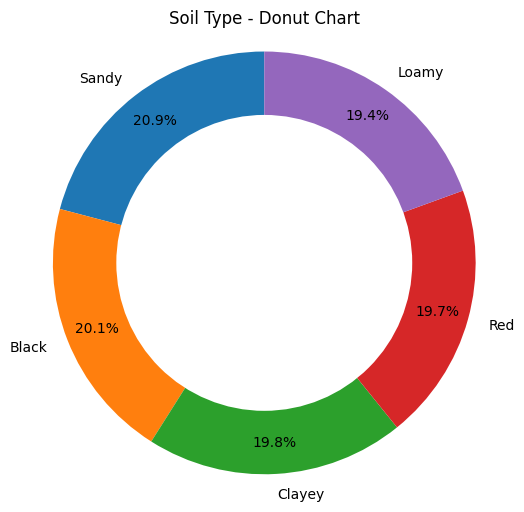

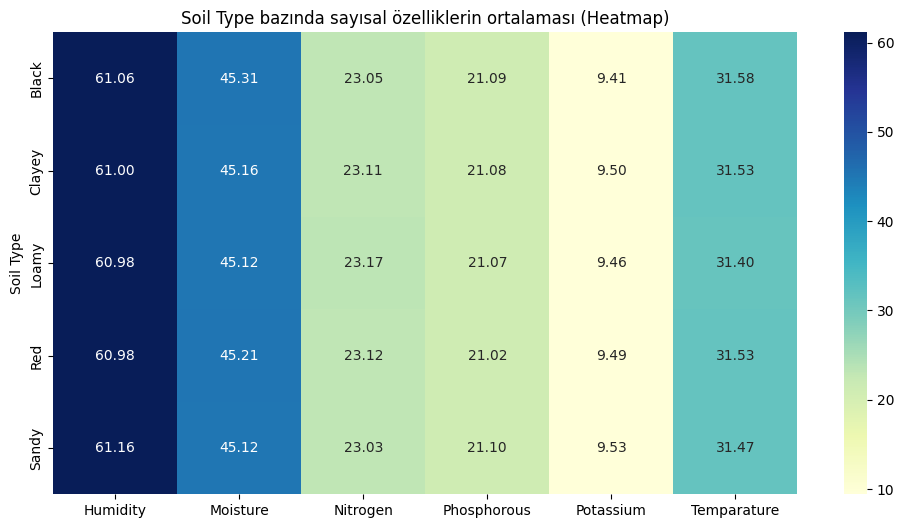

Soil Type için benzersiz değer sayısı: 5
Soil Type sütunundaki eksik değer sayısı: 0
--------------------------------------------------


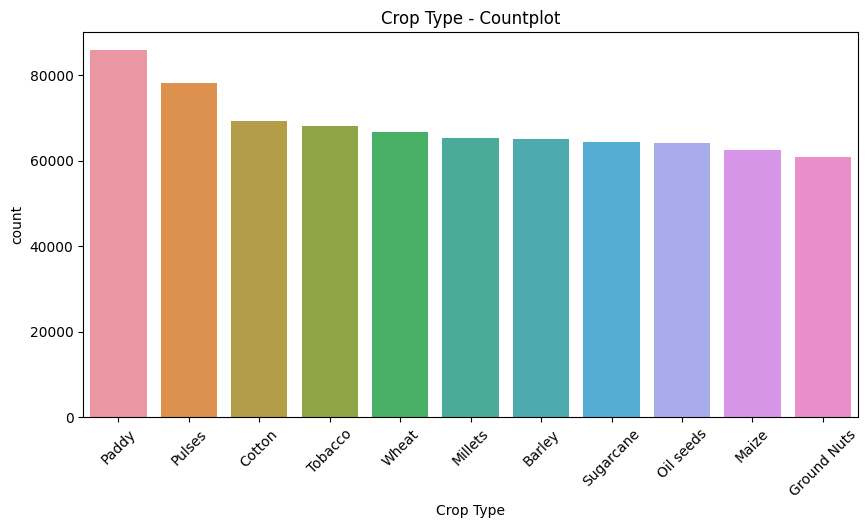

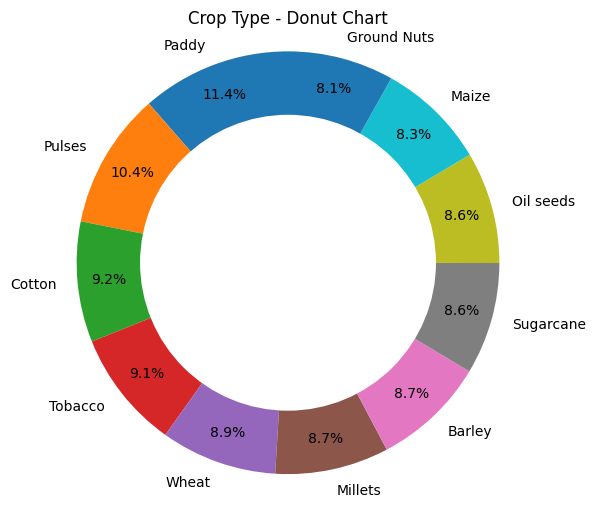

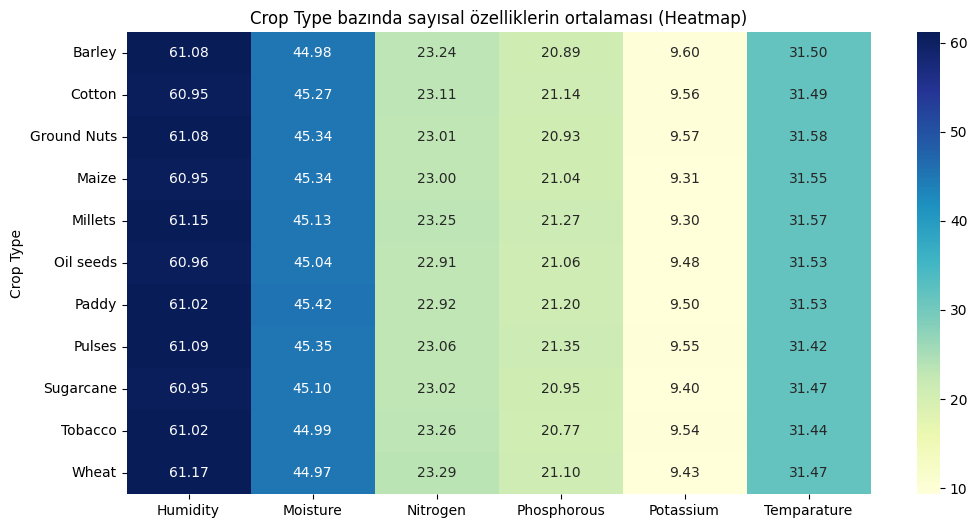

Crop Type için benzersiz değer sayısı: 11
Crop Type sütunundaki eksik değer sayısı: 0
--------------------------------------------------


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

numerical_features = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Potassium", "Phosphorous"]

for feature in ["Soil Type", "Crop Type"]:
    counts = train_df[feature].value_counts()
    
  
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=feature, order=counts.index)
    plt.title(f"{feature} - Countplot")
    plt.xticks(rotation=45)
    plt.show()
    
  
    fig = px.treemap(
        names=counts.index,
        parents=[""] * len(counts),
        values=counts.values,
        title=f"{feature} - Treemap",
        color=counts.values,
        color_continuous_scale='Viridis'
    )
    fig.show()
    
  
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        counts, labels=counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        textprops={'fontsize': 10}
    )
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f"{feature} - Donut Chart")
    plt.axis('equal')
    plt.show()
    
   
    pivot_table = train_df.pivot_table(
        index=feature,
        values=numerical_features,
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"{feature} bazında sayısal özelliklerin ortalaması (Heatmap)")
    plt.ylabel(feature)
    plt.show()
    
  
    print(f"{feature} için benzersiz değer sayısı: {train_df[feature].nunique()}")
    print(f"{feature} sütunundaki eksik değer sayısı: {train_df[feature].isnull().sum()}")
    print("-" * 50)


In [12]:
train_df.isna().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [13]:
test_df = pd.read_csv("/kaggle/input/predicting-optimal-fertilizers-1/test.csv")

In [14]:
test_df

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


In [15]:
test_df.isna().sum()

id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

In [16]:
test_df.shape

(250000, 9)



> Kod, eğitim ve test veri setleri arasındaki farkları giderilir
> Kategorik sütunları sayısal değerlere dönüştürülür
> Sayısal sütunları belirli sütunlar hariç tutarak ölçeklendirilir
> Son olarak, hazır hale gelen verileri gösterildi.


>The code resolves discrepancies between the training and test datasets.

> It converts categorical columns into numerical values.

> It scales numerical columns while excluding certain specified columns.

> Finally, it displays the processed (ready-to-use) datasets.
> > 


In [17]:
train_df.columns = train_df.columns.map(lambda x: x.strip())
test_df.columns = test_df.columns.map(lambda x: x.strip())


In [18]:

missing_in_test = [col for col in train_df.columns 
                   if col not in test_df.columns and col != 'Fertilizer Name']


missing_in_train = [col for col in test_df.columns 
                    if col not in train_df.columns and col != 'id']

if missing_in_test or missing_in_train:
    print(f"Test veri setinde eksik sütunlar: {missing_in_test}")
    print(f"Eğitim veri setinde eksik sütunlar: {missing_in_train}")
    
   
    for col in missing_in_test:
        test_df.loc[:, col] = 0
    
   
    for col in missing_in_train:
        if col != 'id':
            train_df.loc[:, col] = 0


In [19]:
print(train_df.columns)
print(test_df.columns)


Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')
Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')


In [20]:
print('Fertilizer Name' in train_df.columns)
print('id' in test_df.columns)


True
True


In [21]:
print("Eğitim sütunları:", train_df.columns.tolist())
print("Test sütunları:", test_df.columns.tolist())

missing_in_test = [col for col in train_df.columns if col not in test_df.columns and col != 'Fertilizer Name']
missing_in_train = [col for col in test_df.columns if col not in train_df.columns and col != 'id']

print("Eksik sütunlar testte:", missing_in_test)
print("Eksik sütunlar eğitimde:", missing_in_train)


Eğitim sütunları: ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
Test sütunları: ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']
Eksik sütunlar testte: []
Eksik sütunlar eğitimde: []


In [22]:
integer = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
string = ['Soil Type', 'Crop Type']
target_name = 'Fertilizer Name'


In [23]:
base_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

label_encode_columns = []
for feature in base_features:
    label_encode_columns.append(f"{feature}_quantile")
    label_encode_columns.append(f"{feature}_equal")


In [24]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(train_df, test_df, columns):
    train_encoded = train_df.copy()
    test_encoded = test_df.copy()
    encoders = {}

    for col in columns:
        if col in train_df.columns:
            le = LabelEncoder()
            train_encoded[col] = le.fit_transform(train_df[col].astype(str))
            encoders[col] = le
            if col in test_df.columns:
                
                test_encoded[col] = test_df[col].map(lambda x: le.transform([str(x)])[0] if x in le.classes_ else -1)

    return train_encoded, test_encoded, encoders


train_data_encoded, test_data_encoded, label_encoders = encode_categorical_columns(
    train_df, test_df, string
)


In [25]:
print("Kodlama öncesi eğitim verisi (ilk 5 satır):")
print(train_df[string].head())

print("\nKodlama öncesi test verisi (ilk 5 satır):")
print(test_df[string].head())


Kodlama öncesi eğitim verisi (ilk 5 satır):
  Soil Type  Crop Type
0    Clayey  Sugarcane
1     Sandy    Millets
2     Sandy    Millets
3     Sandy     Barley
4       Red      Paddy

Kodlama öncesi test verisi (ilk 5 satır):
  Soil Type    Crop Type
0     Sandy        Wheat
1       Red    Sugarcane
2    Clayey  Ground Nuts
3     Black  Ground Nuts
4       Red       Pulses


In [26]:

train_data_encoded, test_data_encoded, label_encoders = encode_categorical_columns(
    train_df, test_df, string
)


print("\nKodlama sonrası eğitim verisi (ilk 5 satır):")
print(train_data_encoded[string].head())


print("\nKodlama sonrası test verisi (ilk 5 satır):")
print(test_data_encoded[string].head())



Kodlama sonrası eğitim verisi (ilk 5 satır):
   Soil Type  Crop Type
0          1          8
1          4          4
2          4          4
3          4          0
4          3          6

Kodlama sonrası test verisi (ilk 5 satır):
   Soil Type  Crop Type
0          4         10
1          3          8
2          1          2
3          0          2
4          3          7


In [27]:
label_encode_cols = [
    'Temparature_quantile', 'Temparature_equal',
    'Humidity_quantile', 'Humidity_equal',
    'Moisture_quantile', 'Moisture_equal',
    'Nitrogen_quantile', 'Nitrogen_equal',
    'Potassium_quantile', 'Potassium_equal',
    'Phosphorous_quantile', 'Phosphorous_equal'
]


In [28]:
print("Veri setinde mevcut sütunlar:")
print(train_data_encoded.columns.tolist())


Veri setinde mevcut sütunlar:
['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


In [29]:
from sklearn.preprocessing import LabelEncoder

def encode_remaining_objects(train_df, test_df, exclude_cols=None):
    """
    Eğitim veri setinde halen 'object' tipinde olan sütunları label encode eder.
    Hedef sütunlar exclude_cols listesinde belirtilir ve kodlanmaz.

    Args:
        train_df (pd.DataFrame): Eğitim veri seti
        test_df (pd.DataFrame): Test veri seti
        exclude_cols (list): Kodlanmayacak sütun isimleri

    Returns:
        train_encoded, test_encoded
    """
    if exclude_cols is None:
        exclude_cols = []

    train_encoded = train_df.copy()
    test_encoded = test_df.copy()

    object_cols = train_encoded.select_dtypes(include=['object']).columns.tolist()
    cols_to_encode = [col for col in object_cols if col not in exclude_cols]

    if cols_to_encode:
        print(f"Uyarı: Bu sütunlar hala kodlama gerektiriyor: {cols_to_encode}")
        for col in cols_to_encode:
            le = LabelEncoder()
            train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
            if col in test_encoded.columns:
                test_encoded[col] = test_encoded[col].astype(str).map(
                    lambda x: le.transform([x])[0] if x in le.classes_ else -1
                )

    return train_encoded, test_encoded


train_data_encoded, test_data_encoded = encode_remaining_objects(
    train_data_encoded, test_data_encoded, exclude_cols=['Fertilizer Name']
)


In [30]:
print("Kodlanan sütunlar:", train_data_encoded.select_dtypes(include=['int64', 'int32']).columns.tolist())


Kodlanan sütunlar: ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']


In [31]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nesnesi oluştur
scaler = MinMaxScaler()

# Ölçeklendirilmek istenen sayısal sütunlar
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# Eğitim veri setinde sayısal sütunları ölçeklendir
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Test veri setinde aynı scaler ile dönüşüm uygula
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Örnek veri
train_data = pd.DataFrame({
    'Temparature': [20, 25, 30],
    'Humidity': [30, 45, 50],
})

test_data = pd.DataFrame({
    'Temparature': [22, 28],
    'Humidity': [35, 48],
})

numeric_cols = ['Temparature', 'Humidity']
scaler = MinMaxScaler()

train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

print(train_data)
print(test_data)


   Temparature  Humidity
0          0.0      0.00
1          0.5      0.75
2          1.0      1.00
   Temparature  Humidity
0          0.2      0.25
1          0.8      0.90


In [33]:
print(train_data.columns.tolist())


['Temparature', 'Humidity']


In [34]:
numeric_cols = ['Temparature', 'Humidity']


In [35]:
numeric_cols = [col for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'] if col in train_data.columns]
numeric_cols

['Temparature', 'Humidity']

In [36]:
numeric_cols = [col for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'] if col in train_data.columns]

X_train = train_df[numeric_cols]
y_train = train_df['Fertilizer Name']
X_train
y_train


0            28-28
1            28-28
2         17-17-17
3         10-26-26
4              DAP
            ...   
749995       28-28
749996    17-17-17
749997    10-26-26
749998       20-20
749999        Urea
Name: Fertilizer Name, Length: 750000, dtype: object

In [37]:
train_data.head()

,Temparature,Humidity
0,0.0,0.00
1,0.5,0.75
2,1.0,1.00


In [38]:
print(train_data.shape)


(3, 2)


In [39]:
print(dir())  # Tanımlı değişkenleri listeler


['In', 'LabelEncoder', 'MinMaxScaler', 'Out', 'X_train', '_', '_12', '_14', '_15', '_16', '_35', '_36', '_37', '_4', '_6', '_7', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'autotexts', 'base_features', 'centre_circle', 'counts', 'dirname', 'encode_categorical_columns', 'encode_remaining_objects', 'exit', 'feature', 'features', 'fig', 'filename', 'filenames', 'get_ipython', 'integer', 'label_encode_cols', 'label_encode_columns', 'label_encoders', 'missing_in_test', 'missing_in_train', 'np', 'numeric_cols', 'numerical_features', 'os', 'pd', 'pivot_table', 'plt', 'px', 'quit

In [40]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = [col for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'] if col in train_data.columns]

scaler = MinMaxScaler()

train_data_scaled = train_data.copy()
train_data_scaled[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

test_data_scaled = test_data.copy()
test_data_scaled[numeric_cols] = scaler.transform(test_data[numeric_cols])


In [41]:
print(train_data_scaled.columns.tolist())


['Temparature', 'Humidity']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:


# 1. Eğitim ve doğrulama seti oluştur (örnek %20 doğrulama)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2. Model oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_tr, y_tr)

# 3. Doğrulama seti üzerinde tahmin yap
y_val_pred = model.predict(X_val)

# 4. Performans ölçümü
print("Doğrulama Seti Doğruluk:", accuracy_score(y_val, y_val_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_val, y_val_pred))

# 5. Test verisi üzerinde tahmin (test verisi numeric_cols sütunlarını içermeli)
# Örnek:
# X_test = test_df[numeric_cols]
# test_preds = model.predict(X_test)


Doğrulama Seti Doğruluk: 0.16066666666666668
Sınıflandırma Raporu:
               precision    recall  f1-score   support

    10-26-26       0.16      0.23      0.19     22777
    14-35-14       0.16      0.24      0.19     22887
    17-17-17       0.16      0.25      0.19     22491
       20-20       0.16      0.15      0.15     22178
       28-28       0.16      0.20      0.18     22232
         DAP       0.17      0.01      0.02     18972
        Urea       0.00      0.00      0.00     18463

    accuracy                           0.16    150000
   macro avg       0.14      0.15      0.13    150000
weighted avg       0.14      0.16      0.14    150000



In [44]:
print("train_df satır sayısı:", train_df.shape[0])
print("X_train satır sayısı:", X_train.shape[0])
print("y_train satır sayısı:", y_train.shape[0])


train_df satır sayısı: 750000
X_train satır sayısı: 750000
y_train satır sayısı: 750000


In [45]:
target_column = 'Fertilizer Name'
numeric_cols = [col for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'] if col in train_df.columns]

# Özellikler ve hedef
X_train = train_df[numeric_cols]
y_train = train_df[target_column]

print(X_train.shape, y_train.shape)  # Satır sayıları eşit olmalı


(750000, 6) (750000,)


In [46]:
train_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,0.923077,0.909091,0.275,Clayey,Sugarcane,0.842105,0.210526,0.119048,28-28
1,1,0.153846,0.863636,1.000,Sandy,Millets,0.684211,0.315789,0.428571,28-28
2,2,0.307692,0.590909,0.175,Sandy,Millets,0.526316,0.631579,0.380952,17-17-17
3,3,0.769231,0.545455,0.725,Sandy,Barley,0.921053,0.631579,0.095238,10-26-26
4,4,0.769231,0.363636,0.450,Red,Paddy,0.868421,0.105263,0.380952,DAP


In [47]:
train_df.columns.tolist()

['id',
 'Temparature',
 'Humidity',
 'Moisture',
 'Soil Type',
 'Crop Type',
 'Nitrogen',
 'Potassium',
 'Phosphorous',
 'Fertilizer Name']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Eğitim ve doğrulama setini oluşturmak
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 2. Modeli oluştur ve eğitmek için
model = RandomForestClassifier(random_state=42)
model.fit(X_tr, y_tr)

# 3. Doğrulama verisi üzerinde tahmin
y_val_pred = model.predict(X_val)

# 4. Performans ölçümü yap
print("Doğrulama Seti Doğruluk:", accuracy_score(y_val, y_val_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_val, y_val_pred))

# 5. Test verisi üzerinde tahmin yapmak için
# X_test = test_df[numeric_cols]
# test_predictions = model.predict(X_test)
# print("Test tahminleri:", test_predictions)


Doğrulama Seti Doğruluk: 0.16183333333333333
Sınıflandırma Raporu:
               precision    recall  f1-score   support

    10-26-26       0.17      0.19      0.18     22777
    14-35-14       0.17      0.19      0.18     22887
    17-17-17       0.17      0.18      0.18     22491
       20-20       0.16      0.16      0.16     22178
       28-28       0.16      0.16      0.16     22232
         DAP       0.15      0.12      0.13     18972
        Urea       0.14      0.10      0.12     18463

    accuracy                           0.16    150000
   macro avg       0.16      0.16      0.16    150000
weighted avg       0.16      0.16      0.16    150000



In [49]:
numeric_cols = [col for col in ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'] if col in test_data_scaled.columns]


In [50]:
print(test_data_scaled.columns.tolist())


['Temparature', 'Humidity']


In [51]:
for col in ['Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']:
    if col not in test_data_scaled.columns:
        test_data_scaled[col] = 0


In [52]:
test_data_scaled = test_data_scaled[X_train.columns]


In [53]:
# Eksik sütunları test setine ekle
missing_cols = [col for col in X_train.columns if col not in test_data_scaled.columns]

for col in missing_cols:
    test_data_scaled[col] = 0

# Sütunları eğitim sırasına göre sırala
test_data_scaled = test_data_scaled[X_train.columns]

# Tahmin yap
test_predictions = model.predict(test_data_scaled)
print(test_predictions)


['10-26-26' '14-35-14']


In [54]:
# Eğer hedef LabelEncoder ile kodlandıysa
if 'Fertilizer Name' in label_encoders:
    y_encoder = label_encoders['Fertilizer Name']
    test_predictions_labels = y_encoder.inverse_transform(test_predictions)
else:
    test_predictions_labels = test_predictions


In [55]:
submission_df = test_data_scaled[['id']].copy() if 'id' in test_data_scaled.columns else pd.DataFrame()
submission_df['Fertilizer Name'] = test_predictions_labels


In [56]:
submission_df.to_csv('submission.csv', index=False)
print("Tahminler 'submission.csv' dosyasına kaydedildi.")


Tahminler 'submission.csv' dosyasına kaydedildi.


In [57]:
import joblib
joblib.dump(model, 'trained_model.pkl')
print("Model 'trained_model.pkl' olarak kaydedildi.")


Model 'trained_model.pkl' olarak kaydedildi.


In [58]:
model_loaded = joblib.load('trained_model.pkl')
model_loaded


RandomForestClassifier(random_state=42)